In [1]:
print("hello world")

hello world


In [5]:
from cellphonedb.src.core.methods import cpdb_statistical_analysis_method

cpdb_results = cpdb_statistical_analysis_method.call(
    cpdb_file_path="/Users/yanghyejeong/.cellphonedb/releases/cellphonedb.zip",
    meta_file_path="meta_final_celltype_BYTYPE.csv",
    counts_file_path="counts_final_cpdb_BYTYPE.txt",
    counts_data="hgnc_symbol",
    output_path="./out"
)

Reading user files...
The following user files were loaded successfully:
counts_final_cpdb_BYTYPE.txt
meta_final_celltype_BYTYPE.csv
[ ][CORE][12/10/25-15:51:39][INFO] [Cluster Statistical Analysis] Threshold:0.1 Iterations:1000 Debug-seed:-1 Threads:4 Precision:3
[ ][CORE][12/10/25-15:51:41][INFO] Running Real Analysis
[ ][CORE][12/10/25-15:51:41][INFO] Running Statistical Analysis


100%|██████████| 1000/1000 [00:04<00:00, 232.26it/s]


[ ][CORE][12/10/25-15:51:45][INFO] Building Pvalues result
[ ][CORE][12/10/25-15:51:45][INFO] Building results
Saved deconvoluted to ./out/statistical_analysis_deconvoluted_10_12_2025_155145.txt
Saved deconvoluted_percents to ./out/statistical_analysis_deconvoluted_percents_10_12_2025_155145.txt
Saved means to ./out/statistical_analysis_means_10_12_2025_155145.txt
Saved pvalues to ./out/statistical_analysis_pvalues_10_12_2025_155145.txt
Saved significant_means to ./out/statistical_analysis_significant_means_10_12_2025_155145.txt


✅ Found 0 matching columns: []


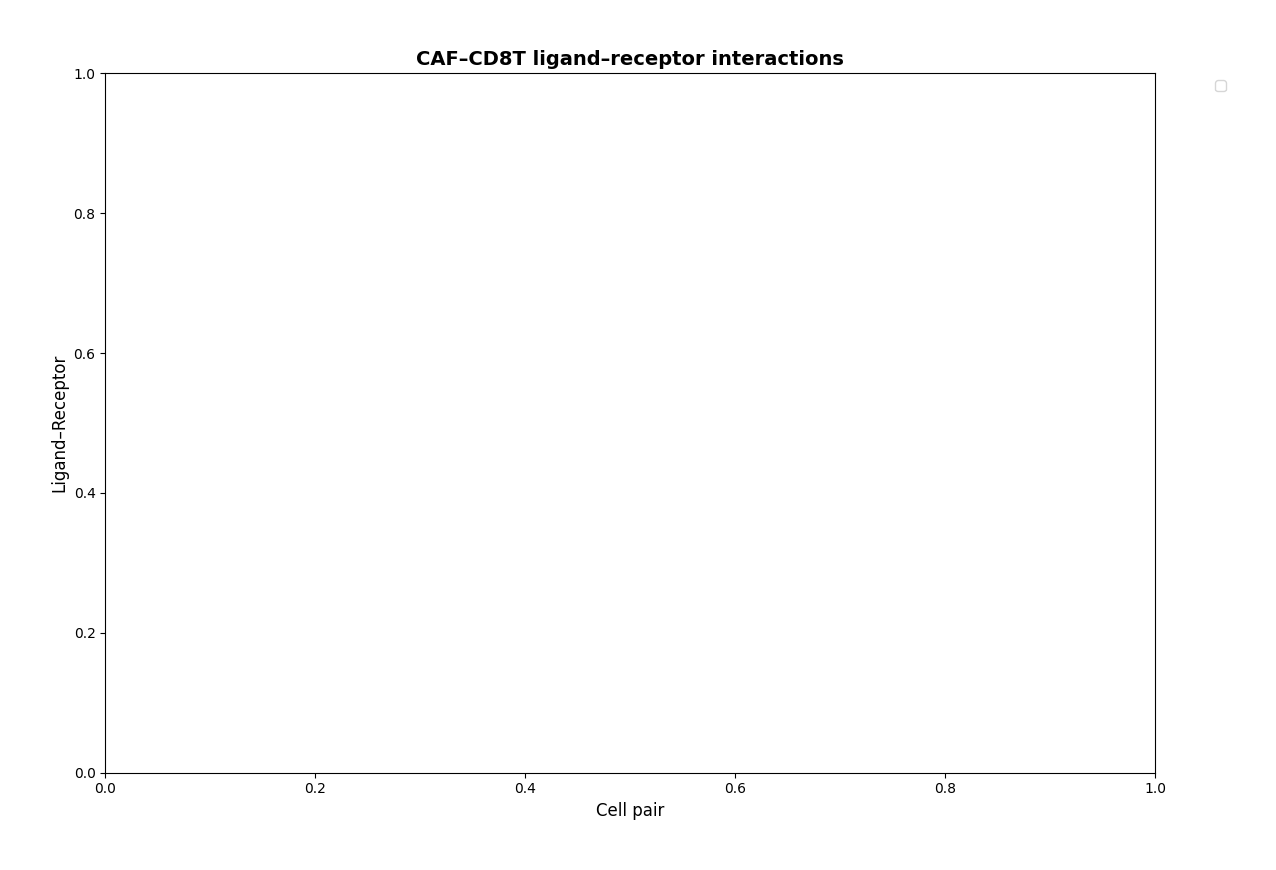

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 파일 로드
means = pd.read_csv("./out/statistical_analysis_significant_means_10_12_2025_155145.txt", sep="\t")

# 🔍 실제 열 이름 중 CAF 와 CD8 이 모두 포함된 컬럼 자동 탐색
cols = [c for c in means.columns if ('CAF' in c and 'CD8' in c)]
print(f"✅ Found {len(cols)} matching columns:", cols)

# 상호작용 데이터 필터링
subset = means.loc[:, ['interacting_pair'] + cols]
melted = subset.melt(id_vars='interacting_pair', var_name='pair', value_name='mean_expression')
melted = melted[melted['mean_expression'] > 0]

# 시각화
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=melted,
    x='pair',
    y='interacting_pair',
    size='mean_expression',
    hue='mean_expression',
    palette='coolwarm',
    sizes=(20, 200)
)
plt.title("CAF–CD8T ligand–receptor interactions", fontsize=14, fontweight='bold')
plt.xlabel("Cell pair", fontsize=12)
plt.ylabel("Ligand–Receptor", fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [16]:
import pandas as pd
means = pd.read_csv("./out/statistical_analysis_significant_means_10_12_2025_155145.txt", sep="\t")
[c for c in means.columns if 'CA' in c or 'Fibro' in c or 'fibro' in c]

[]

In [17]:
import pandas as pd
means = pd.read_csv("./out/statistical_analysis_significant_means_10_12_2025_155145.txt", sep="\t")

# Cell–Cell interaction 열 이름만 출력
cell_cols = [c for c in means.columns if "|" in c]
print(f"총 {len(cell_cols)}개의 interaction column 존재:")
print(cell_cols[:40])  # 처음 40개만 보기

총 169개의 interaction column 존재:
['CD4Tconv|CD4Tconv', 'CD4Tconv|CD4Teff', 'CD4Tconv|CD8Tcm', 'CD4Tconv|CD8Teff', 'CD4Tconv|CD8Tn', 'CD4Tconv|Epithelial', 'CD4Tconv|Mono/Macro', 'CD4Tconv|NK', 'CD4Tconv|Th1', 'CD4Tconv|Th17', 'CD4Tconv|Th2', 'CD4Tconv|Tprolif', 'CD4Tconv|Treg', 'CD4Teff|CD4Tconv', 'CD4Teff|CD4Teff', 'CD4Teff|CD8Tcm', 'CD4Teff|CD8Teff', 'CD4Teff|CD8Tn', 'CD4Teff|Epithelial', 'CD4Teff|Mono/Macro', 'CD4Teff|NK', 'CD4Teff|Th1', 'CD4Teff|Th17', 'CD4Teff|Th2', 'CD4Teff|Tprolif', 'CD4Teff|Treg', 'CD8Tcm|CD4Tconv', 'CD8Tcm|CD4Teff', 'CD8Tcm|CD8Tcm', 'CD8Tcm|CD8Teff', 'CD8Tcm|CD8Tn', 'CD8Tcm|Epithelial', 'CD8Tcm|Mono/Macro', 'CD8Tcm|NK', 'CD8Tcm|Th1', 'CD8Tcm|Th17', 'CD8Tcm|Th2', 'CD8Tcm|Tprolif', 'CD8Tcm|Treg', 'CD8Teff|CD4Tconv']


In [18]:
import pandas as pd
meta = pd.read_csv("meta_final_celltype_BYTYPE.csv")
meta['cell_type'].unique()

array(['CD4Tconv', 'CD4Teff', 'CD8Tcm', 'CD8Teff', 'CD8Tn', 'Epithelial',
       'Mono/Macro', 'NK', 'Th1', 'Th17', 'Th2', 'Tprolif', 'Treg'],
      dtype=object)